# Descubra as melhores notas de matemática do ENEM 2016

Você deverá criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016. 

## Detalhes

O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o [Dicionário dos Microdados do Enem 2016](https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip).

Muitas universidades brasileiras utilizam o ENEM para selecionar seus futuros alunos e alunas. Isto é feito com uma média ponderada das notas das provas de matemática, ciências da natureza, linguagens e códigos, ciências humanas e redação. Determine os 20 melhores colocados, por ordem, para os pesos abaixo:

- matemática: 3
- ciências da natureza: 2
- linguagens e códigos: 1.5
- ciências humanas: 1
- redação: 3

No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna **NU_NOTA_MT**) de quem participou do ENEM 2016. 

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: **NU_INSCRICAO** e **NU_NOTA_MT**.

Faça o upload do arquivo answer.csv usando o botão "Submeter resposta".


In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# DF Train

In [2]:
df_train = pd.read_csv('train.csv', index_col=0, parse_dates=True)

In [3]:
df_train.shape

(13730, 166)

In [4]:
df_train.duplicated().value_counts()

False    13730
dtype: int64

In [5]:
df_train.duplicated('NU_INSCRICAO').value_counts()

False    13730
dtype: int64

In [6]:
df_train.reset_index()['index'].duplicated().value_counts()#nunique()

True     9143
False    4587
Name: index, dtype: int64

In [7]:
df_train.loc[2047]

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
2047,5175a4cec8b772a750f76095dbb9dce3759457d7,2016,4318903,São Luiz Gonzaga,43,RS,16,F,0.0,1,...,NaN,A,A,A,A,C,A,A,A,A
2047,d3f69588b6c9190869cbb1222bb4093134e51bac,2016,2301000,Aquiraz,23,CE,19,M,0.0,1,...,NaN,A,A,A,A,B,A,A,A,A
2047,916dba08594971d4974dd2156591080ea8fca812,2016,1600154,Pedra Branca do Amapari,16,AP,17,M,0.0,3,...,NaN,A,A,A,A,B,A,A,B,A


In [8]:
df_train.reset_index(drop=True,inplace=True)#.iloc[0:1,0:23]

In [9]:
df_train.shape

(13730, 166)

In [42]:
#Selecting the same datas who exist in df_desafio(TRAIN)
var = ['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047']

df_train = df_train[var]

#### REMOVENDO PESSOAS QUE FALTOU EM ALGUM DOS DIAS DE PROVA

In [125]:
df_train = df_train[(df_train['TP_PRESENCA_CH']==1)&(df_train['TP_PRESENCA_LC']==1)]

In [337]:
df_train = df_train.loc[(df_train['NU_NOTA_CN'].notnull())  & (df_train['NU_NOTA_CN'] != 0)
             & (df_train['NU_NOTA_CH'].notnull()) & (df_train['NU_NOTA_CH'] != 0) 
             & (df_train['NU_NOTA_LC'].notnull()) & (df_train['NU_NOTA_LC'] != 0) 
             & (df_train['NU_NOTA_REDACAO'].notnull()) & (df_train['NU_NOTA_REDACAO'] != 0)    ]

In [360]:
df_train[['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5']].fillna(0,inplace=True)

# DF Test DF_DESAFIO

In [355]:
df_desafio = pd.read_csv('test.csv')
df_desafio.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [356]:
print(df_desafio.shape)
df_desafio = df_desafio.loc[(df_desafio['TP_PRESENCA_CH']==1)&(df_desafio['TP_PRESENCA_LC']==1)]
df_desafio.shape

(4576, 47)


(3360, 47)

In [357]:
df_desafio = df_desafio.loc[(df_desafio['NU_NOTA_CN'].notnull())  & (df_desafio['NU_NOTA_CN'] != 0) 
                  & (df_desafio['NU_NOTA_CH'].notnull()) & (df_desafio['NU_NOTA_CH'] != 0) 
                  & (df_desafio['NU_NOTA_LC'].notnull())  & (df_desafio['NU_NOTA_LC'] != 0) 
                  & (df_desafio['NU_NOTA_REDACAO'].notnull()) & (df_desafio['NU_NOTA_REDACAO'] != 0)  ]
df_desafio.shape

(3286, 47)

In [359]:
df_desafio[['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5']].fillna(0,inplace=True)

C:\Users\User Ambev\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [128]:
pd.options.display.max_columns = 40

## Feature Selection

In [143]:
df_train.agg(['count','sum'])

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,...,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
count,10097,10097,10097,10097,10097,10097,10097,10097,10097,10097,3628.0,10097,3628.0,10097,10097,10097,10097,10097,10097,10097,...,10097.0,10097.0,10097.0,10097.0,10097,10097.0,10097.0,10097.0,10097.0,10097.0,10097.0,10097.0,10097,10097,10097,10097,10097,10097,3991.0,10097
sum,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad2c3aca...,308361,RSCEBAMTRSPEPEMARSRNPRMAPAMGMGESSPPRMAPECERJSP...,207751,MFFFFFFFMMMFMFFMFMFFMFFFFMFFMFMMFFFMMFFMMMFFFM...,21935,10555,18280,17482,14269,4109.0,1498,8306.0,11,0,4,1,1,99,4,...,4785094.6,5354904.8,5216767.1,4873303.3,5848,11114.0,1210432.0,1130844.0,1079430.0,1143085.0,782095.0,5345886.0,DAEEGHADBBFADCDBBBEEBCDACEBHEHBCEEHDCHEBFCHBGE...,DAEDFEBEEAGACBDBCBCDBCCDFGEEGDCCEFEGCHEEFDCDFE...,CBCCLBBBBAJBBCBBCFBBDADBHFCCGEDHCDDDBCCDHBABID...,AABBBAAACABAAABABBBABAAABBBBDBCABBBAAABBBAAABA...,AABBBBAAAABAAABABABAAABABBBBBBBBBBBAAAABBAAABA...,CAACAACABACCAAABBCBAABCAAAACAACCAAABAABCABABAB...,NaN,AAAADAAAAADAAAAAAAAAAAAAADAABAAAAADAAAAAAAAADA...


In [57]:
var

['NU_INSCRICAO',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'TP_DEPENDENCIA_ADM_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_IDOSO',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q006',
 'Q024',
 'Q025',
 'Q026',
 'Q027',
 'Q047']

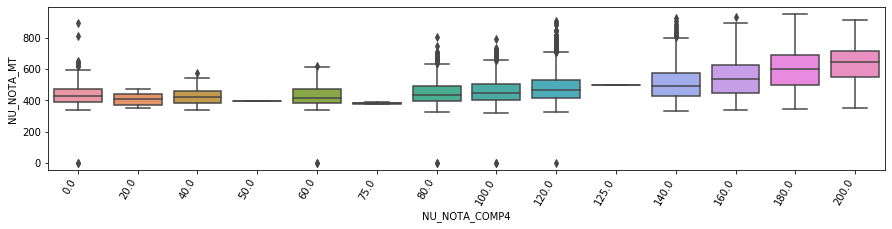

In [121]:
ax =sns.boxplot(x='NU_NOTA_COMP4', y='NU_NOTA_MT', data=df_train.fillna(0)) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
ax.figure.set_size_inches(15,3)

In [122]:
(df_train[[ 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_COMP1', 'NU_NOTA_COMP2'
                      , 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO',]].corr())

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
NU_NOTA_CN,1.000000,0.611573,0.545667,0.584941,0.357672,0.412894,0.429447,0.407747,0.416349,0.459938
NU_NOTA_CH,0.611573,1.000000,0.692988,0.529594,0.443809,0.488050,0.510452,0.488797,0.494798,0.550582
NU_NOTA_LC,0.545667,0.692988,1.000000,0.492031,0.431546,0.453135,0.475782,0.468100,0.443357,0.513982
NU_NOTA_MT,0.584941,0.529594,0.492031,1.000000,0.299811,0.335441,0.350556,0.342629,0.343998,0.379891
NU_NOTA_COMP1,0.357672,0.443809,0.431546,0.299811,1.000000,0.755549,0.758445,0.823696,0.557588,0.862036
NU_NOTA_COMP2,0.412894,0.488050,0.453135,0.335441,0.755549,1.000000,0.874899,0.807150,0.655358,0.917915
NU_NOTA_COMP3,0.429447,0.510452,0.475782,0.350556,0.758445,0.874899,1.000000,0.826533,0.663832,0.925552
NU_NOTA_COMP4,0.407747,0.488797,0.468100,0.342629,0.823696,0.807150,0.826533,1.000000,0.634410,0.914132
NU_NOTA_COMP5,0.416349,0.494798,0.443357,0.343998,0.557588,0.655358,0.663832,0.634410,1.000000,0.816160
NU_NOTA_REDACAO,0.459938,0.550582,0.513982,0.379891,0.862036,0.917915,0.925552,0.914132,0.816160,1.000000


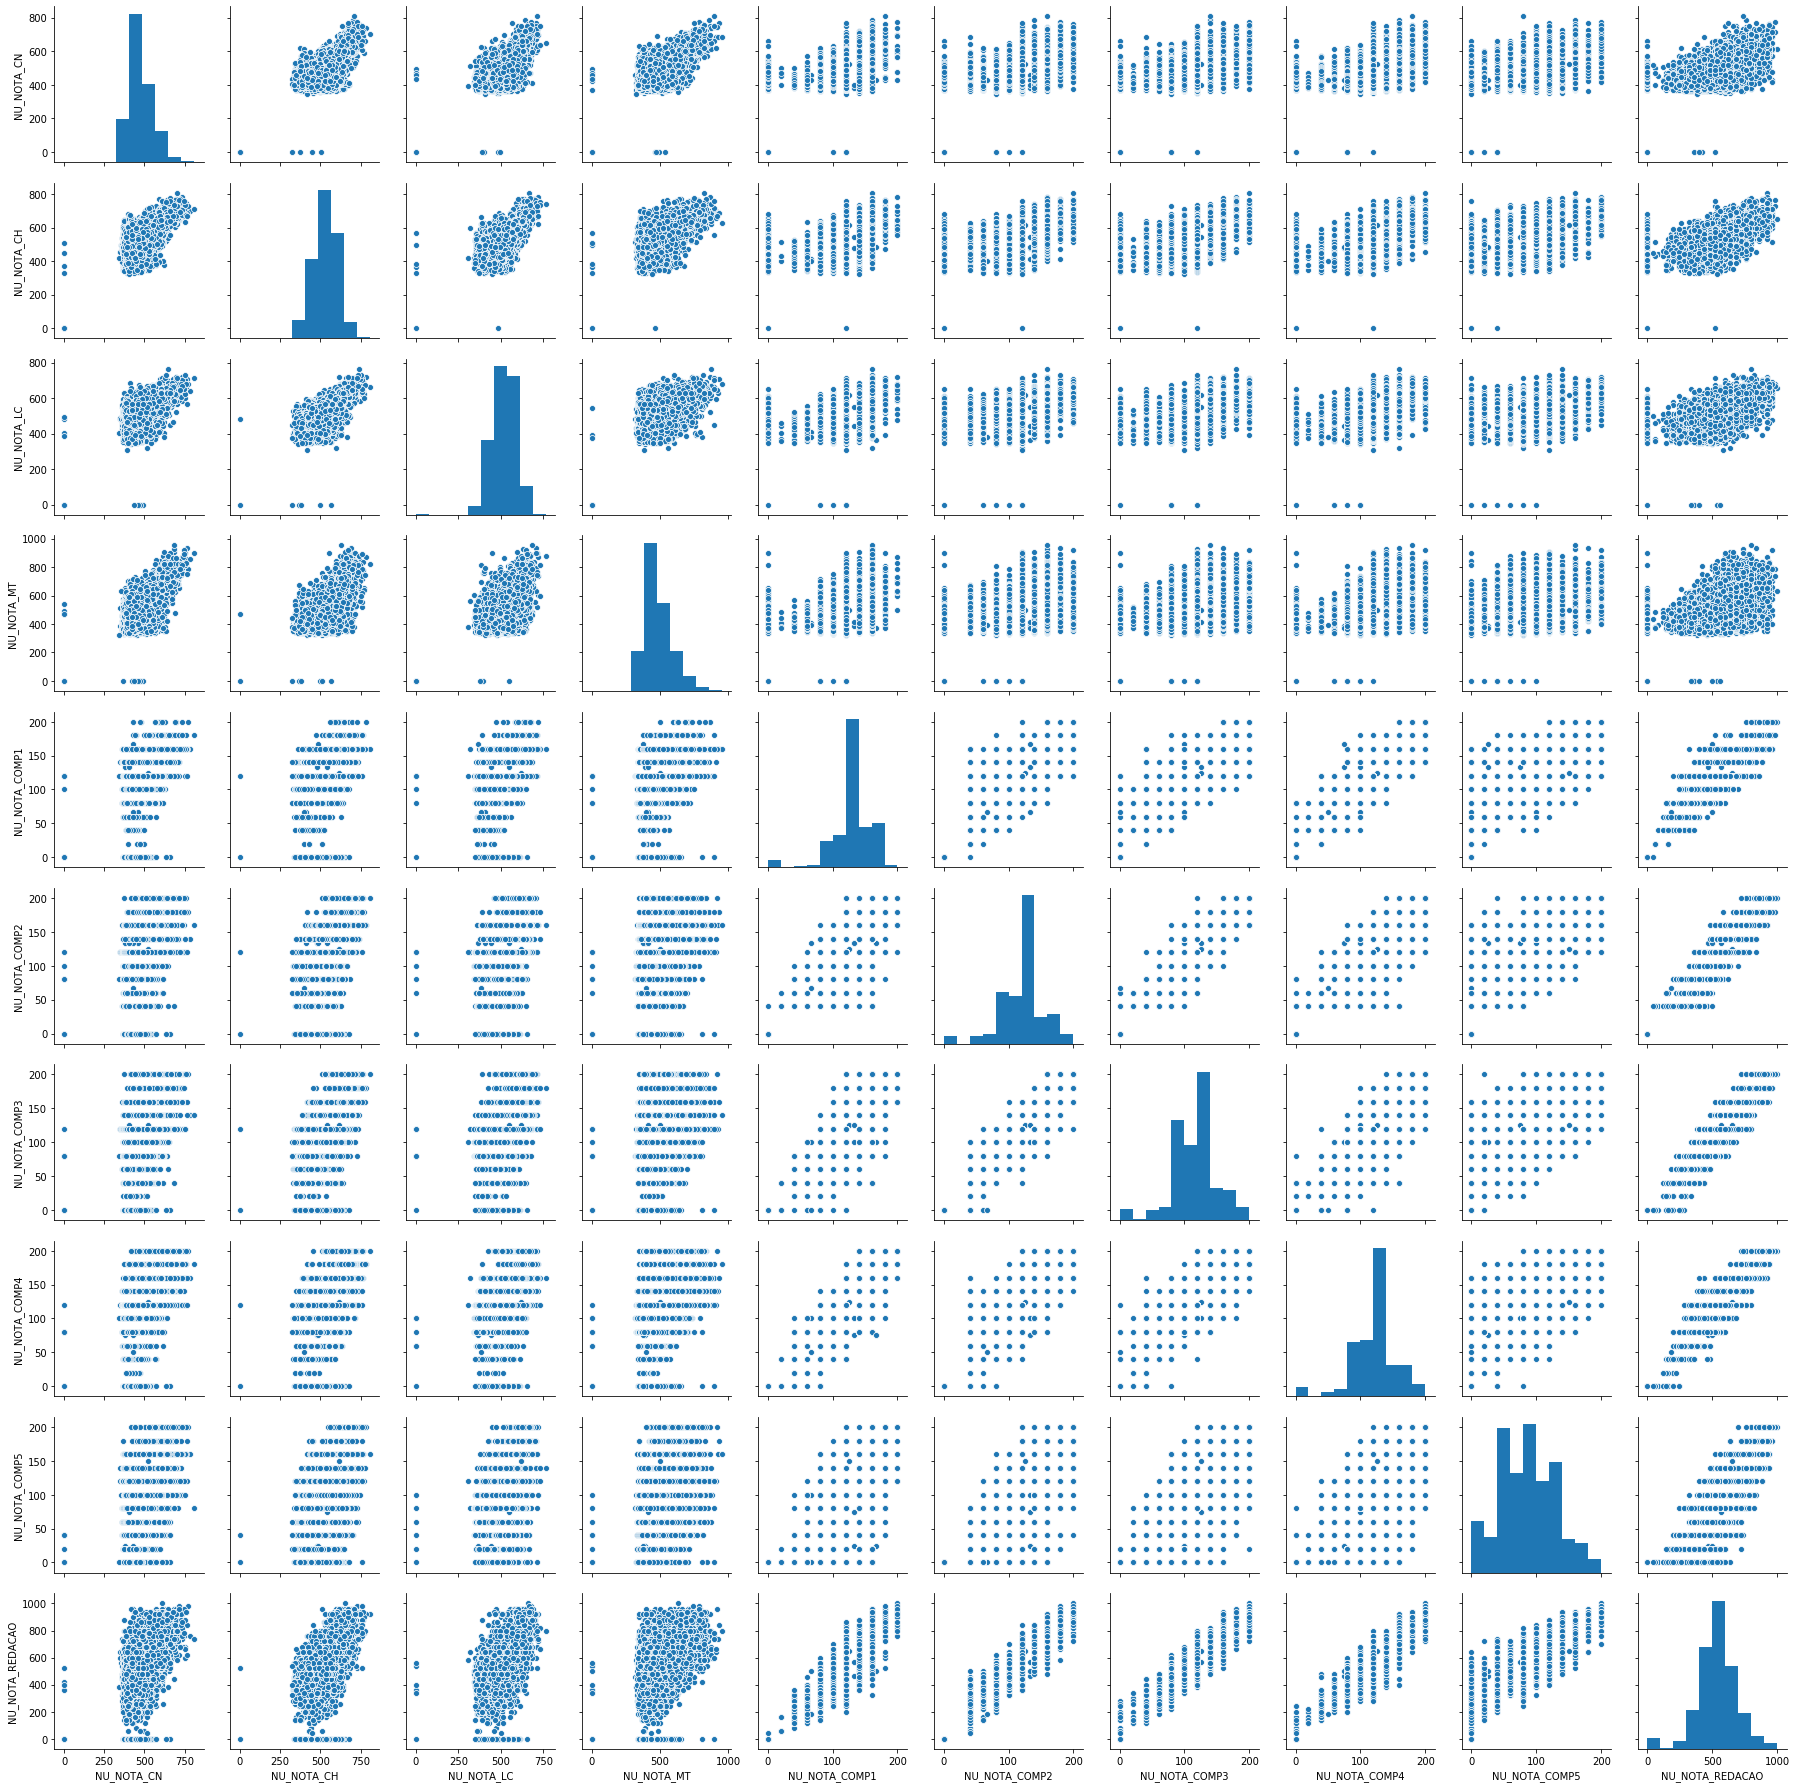

In [81]:
sns.pairplot(df_train[[ 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_COMP1'
                       , 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO',]])

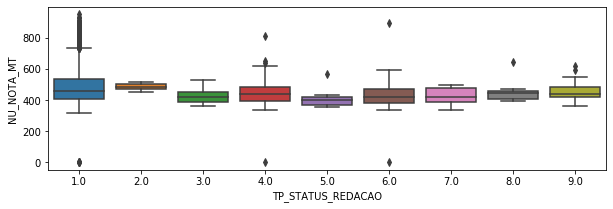

In [82]:
sns.boxplot(x='TP_STATUS_REDACAO', y='NU_NOTA_MT', data=df_train.fillna(0)).figure.set_size_inches(10,3)

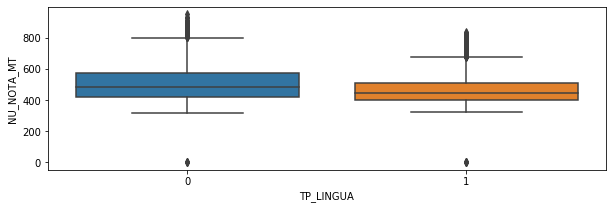

In [83]:
sns.boxplot(x='TP_LINGUA', y='NU_NOTA_MT', data=df_train.fillna(0)).figure.set_size_inches(10,3)

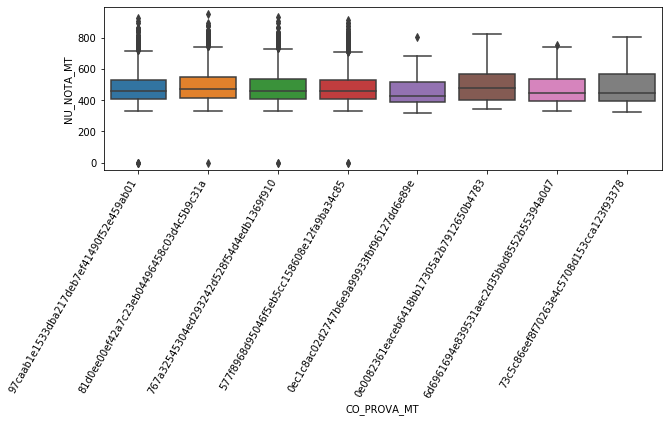

In [84]:
ax = sns.boxplot(x='CO_PROVA_MT', y='NU_NOTA_MT', data=df_train)
ax.figure.set_size_inches(10,3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
ax

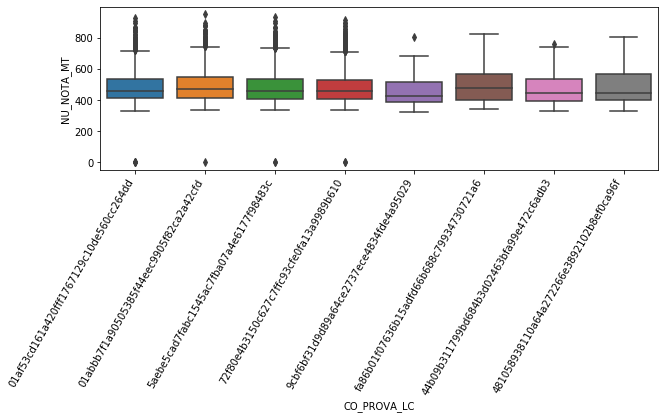

In [85]:
ax = sns.boxplot(x='CO_PROVA_LC', y='NU_NOTA_MT', data=df_train)
ax.figure.set_size_inches(10,3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
ax

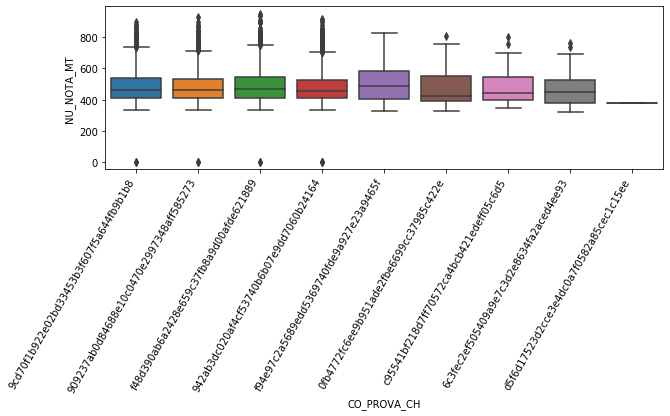

In [86]:
ax = sns.boxplot(x='CO_PROVA_CH', y='NU_NOTA_MT', data=df_train)
ax.figure.set_size_inches(10,3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
ax

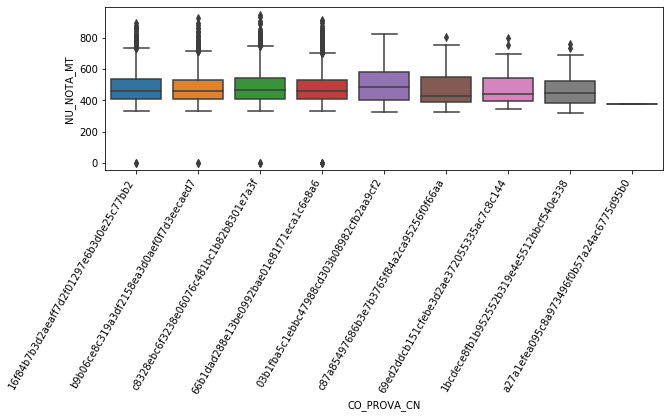

In [87]:
ax = sns.boxplot(x='CO_PROVA_CN', y='NU_NOTA_MT', data=df_train)
ax.figure.set_size_inches(10,3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
ax

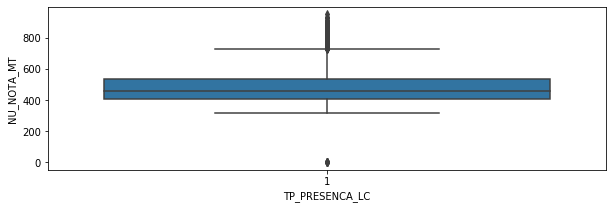

In [88]:
sns.boxplot(x='TP_PRESENCA_LC', y='NU_NOTA_MT', data=df_train.fillna(0)).figure.set_size_inches(10,3)

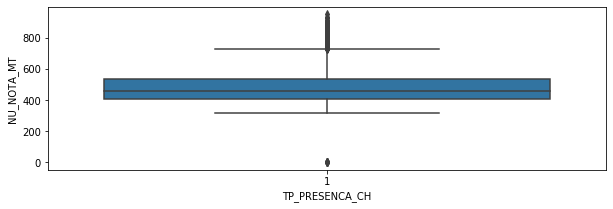

In [89]:
# === 'TP_PRESENCA_CN'
sns.boxplot(x='TP_PRESENCA_CH', y='NU_NOTA_MT', data=df_train.fillna(0)).figure.set_size_inches(10,3)

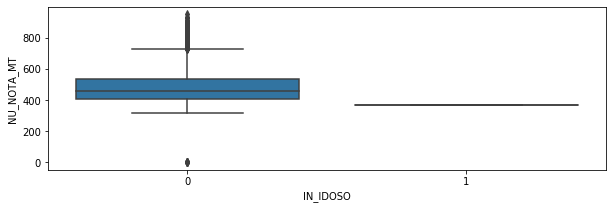

In [90]:
sns.boxplot(x='IN_IDOSO', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

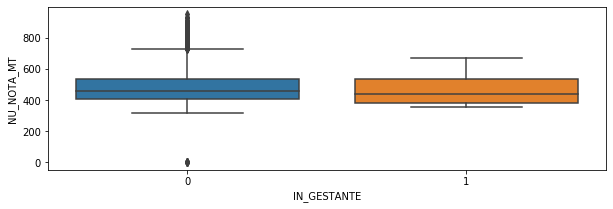

In [91]:
sns.boxplot(x='IN_GESTANTE', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

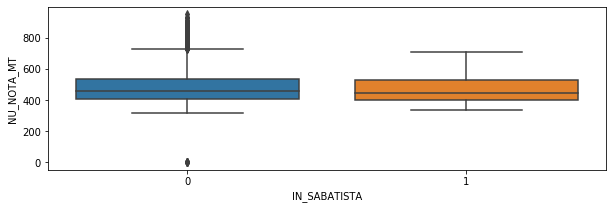

In [92]:
sns.boxplot(x='IN_SABATISTA', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

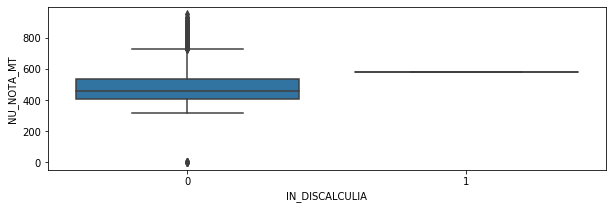

In [93]:
sns.boxplot(x='IN_DISCALCULIA', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

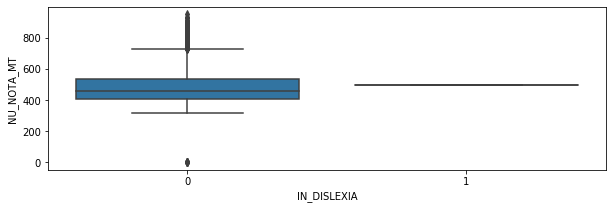

In [94]:
sns.boxplot(x='IN_DISLEXIA', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

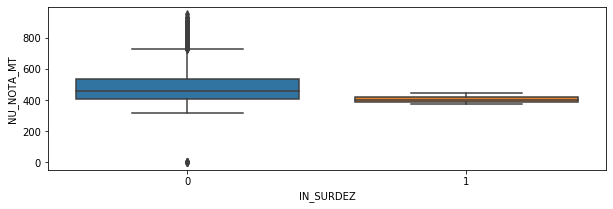

In [95]:
sns.boxplot(x='IN_SURDEZ', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

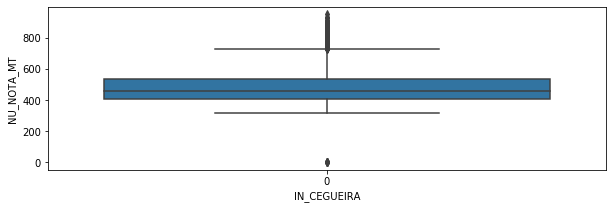

In [96]:
sns.boxplot(x='IN_CEGUEIRA', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

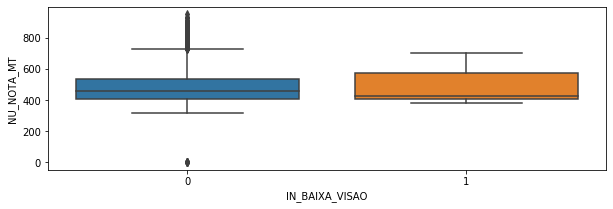

In [97]:
sns.boxplot(x='IN_BAIXA_VISAO', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

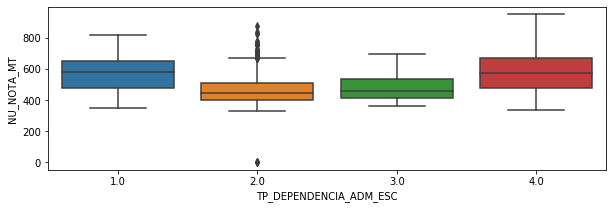

In [98]:
sns.boxplot(x='TP_DEPENDENCIA_ADM_ESC', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

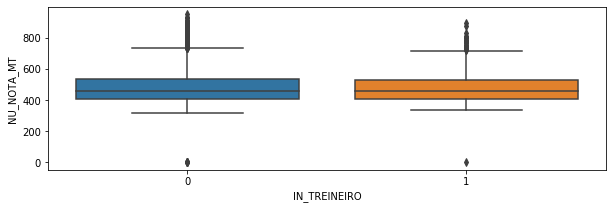

In [99]:
sns.boxplot(x='IN_TREINEIRO', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

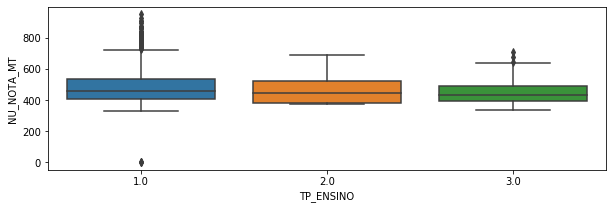

In [100]:
sns.boxplot(x='TP_ENSINO', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

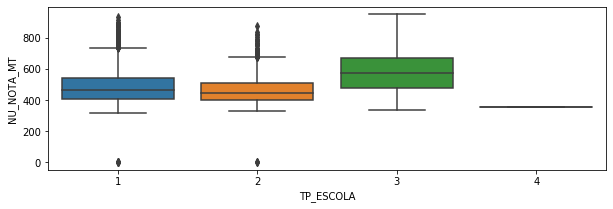

In [101]:
sns.boxplot(x='TP_ESCOLA', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

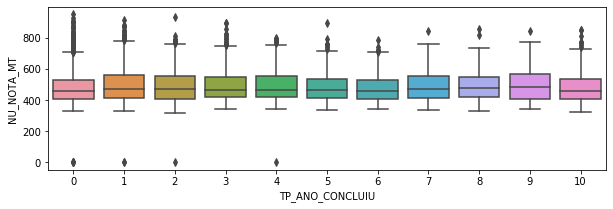

In [102]:
sns.boxplot(x='TP_ANO_CONCLUIU', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

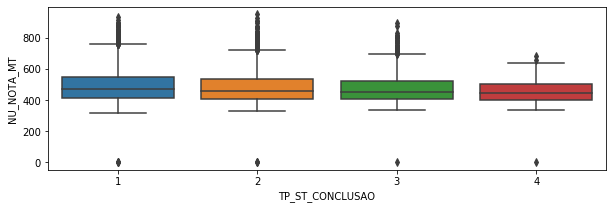

In [103]:
sns.boxplot(x='TP_ST_CONCLUSAO', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

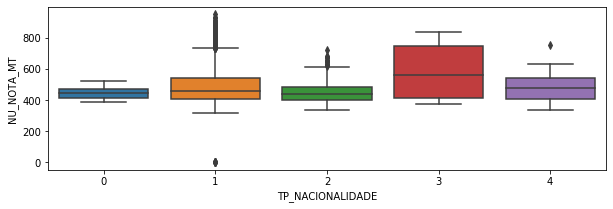

In [104]:
sns.boxplot(x='TP_NACIONALIDADE', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

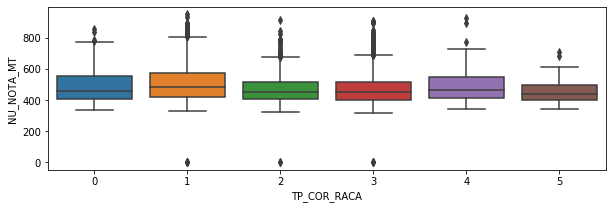

In [105]:
sns.boxplot(x='TP_COR_RACA', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

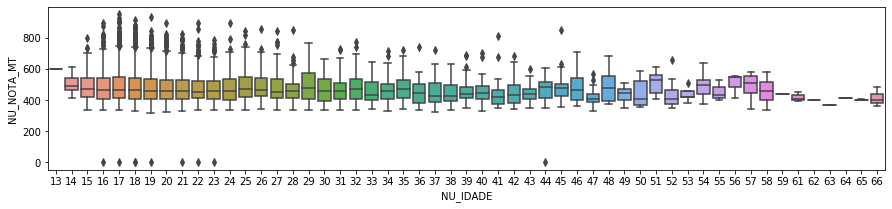

In [106]:
sns.boxplot(x='NU_IDADE', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(15,3)

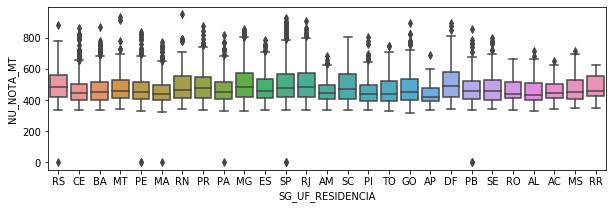

In [107]:
sns.boxplot(x='SG_UF_RESIDENCIA', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

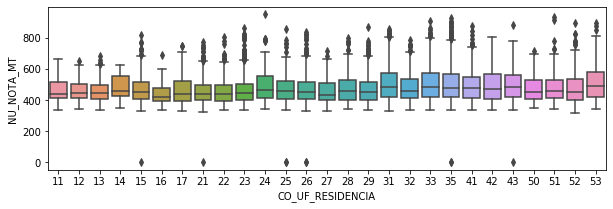

In [108]:
sns.boxplot(x='CO_UF_RESIDENCIA', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

### QUESTIONÁRIOS

In [130]:
'Q001',
 'Q002',
 'Q006',
 'Q024',
 'Q025',
 'Q047'

IndentationError: unexpected indent (<ipython-input-130-e12ee4ae5a7b>, line 2)

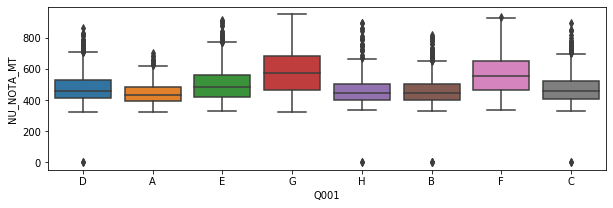

In [131]:
sns.boxplot(x='Q001', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

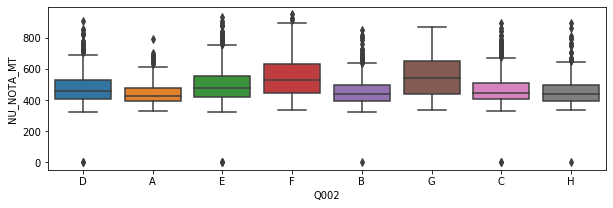

In [132]:
sns.boxplot(x='Q002', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

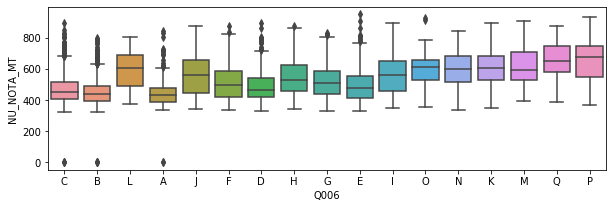

In [133]:
sns.boxplot(x='Q006', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

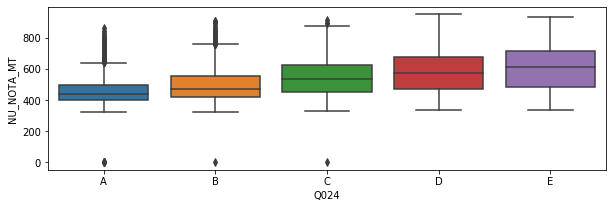

In [134]:
sns.boxplot(x='Q024', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

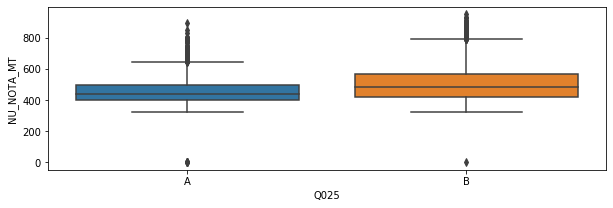

In [135]:
sns.boxplot(x='Q025', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

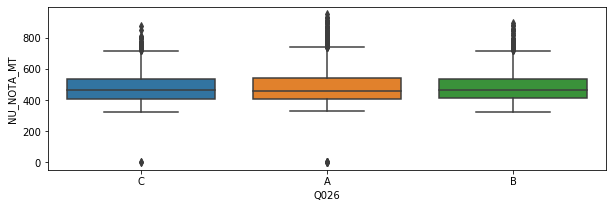

In [136]:
sns.boxplot(x='Q026', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

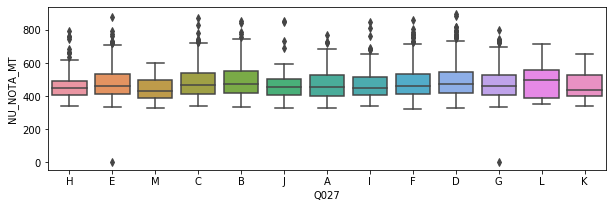

In [137]:
sns.boxplot(x='Q027', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

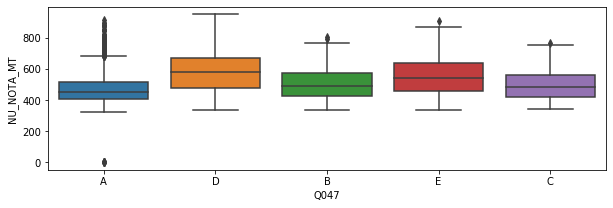

In [138]:
sns.boxplot(x='Q047', y='NU_NOTA_MT', data=df_train).figure.set_size_inches(10,3)

In [154]:
##SELEÇÔES
selecao = ['NU_INSCRICAO','NU_NOTA_MT','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
df_train[selecao]

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,399.4,436.3,495.4,581.2,520.0
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,459.8,474.5,544.1,599.0,580.0
5,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,364.5,439.7,583.2,410.9,620.0
6,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,529.2,420.1,604.2,484.5,560.0
7,2eb189d4912f64b19d1967e8e84b6141aba18770,566.7,619.6,625.8,611.2,620.0
...,...,...,...,...,...,...
13725,aadf671ef8c1c6efa42e69432093ab83c17a52ac,403.2,438.2,419.7,394.5,440.0
13726,461f7ef2753d9d5fa0b054930d6b0e0eec318e81,452.4,423.8,557.9,533.0,560.0
13727,5354503700ecf2388f68990435390b6e1ad454ee,398.0,460.5,528.9,569.3,600.0
13728,c7a9e94a42bd76b7978f13c013a61702e36cc42c,386.6,422.5,621.7,569.0,460.0


## End Box-Plot

## Y = NU_NOTA_MT  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  X = selection[]

## Def Selections

In [285]:
print('selecao do DF PRINTI:' , selecao)
#4 variaveis
selection4 = ['NU_INSCRICAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
selection4

selecao do DF PRINTI: ['NU_INSCRICAO', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']


['NU_INSCRICAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

## DataFrame de TEST

In [289]:
X4_desafio = df_desafio[selection4]#.fillna(0)
X4_desafio.head(2)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,464.8,443.5,431.8,420.0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,391.1,491.1,548.0,580.0


## DataFrame de TREINO

In [290]:
from sklearn.model_selection import train_test_split

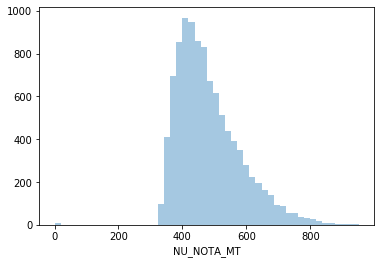

In [291]:
sns.distplot(df_train['NU_NOTA_MT'], kde=False)

In [292]:
#X4
X4 = df_train[selection4] #df_train[df_train['NU_NOTA_MT']>0][selection4].fillna(0)#
X4.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,436.3,495.4,581.2,520.0
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,474.5,544.1,599.0,580.0
5,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,439.7,583.2,410.9,620.0
6,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,420.1,604.2,484.5,560.0
7,2eb189d4912f64b19d1967e8e84b6141aba18770,619.6,625.8,611.2,620.0


In [293]:
Y4_train = df_train['NU_NOTA_MT'] #df_train[df_train['NU_NOTA_MT']>0]['NU_NOTA_MT']#
Y4_train.head()

0    399.4
1    459.8
5    364.5
6    529.2
7    566.7
Name: NU_NOTA_MT, dtype: float64

In [294]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, Y4_train, test_size=0.2)

In [295]:
print(df_train.shape,X4_train.shape, X4_test.shape)

(10097, 47) (8077, 5) (2020, 5)


## Prediction Models


In [296]:
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [297]:
lm1 = LinearRegression()

# Linear Model

In [298]:
X4_train.iloc[:,1:]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
9607,545.0,619.1,589.3,640.0
5436,372.5,600.4,448.6,500.0
13171,376.5,537.2,526.5,440.0
6704,374.0,443.3,418.9,400.0
10648,542.3,610.1,568.0,760.0
...,...,...,...,...
6124,428.2,481.0,518.5,500.0
8114,543.2,470.2,507.7,0.0
4676,473.4,495.4,398.0,640.0
1491,446.7,536.9,465.2,520.0


In [299]:
lm1.fit(X4_train.iloc[:,1:],y4_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [300]:
print('coeficente linear, when Xn==0: B== |', lm1.intercept_)

coeficente linear, when Xn==0: B== | -16.782304190689842


In [301]:
pd.DataFrame(zip(X4_train.iloc[:,1:].columns, lm1.coef_), columns=['features','estimatedCoefficients'])

,features,estimatedCoefficients
0,NU_NOTA_CN,0.528617
1,NU_NOTA_CH,0.251118
2,NU_NOTA_LC,0.204782
3,NU_NOTA_REDACAO,0.019070


### Estimando o modelo de Regressão Linear Multipla

In [302]:
print('O quanto a reta de regressão consegue explicar da variável Y é o COEFICIENTE DE DETERMINAÇÃO\n  R² = {} '\
      .format(lm1.score(X4_train.iloc[:,1:], y4_train)))

O quanto a reta de regressão consegue explicar da variável Y é o COEFICIENTE DE DETERMINAÇÃO
  R² = 0.3970137711744326 


### PREDICT

#### X4_test,X4_train, y4_test, y4_train    DF_TRAIN(selection4)      ||||||     X4_desafio  y4_desafio     DF_DESAFIO(selectio4 ) (test.csv)

In [303]:
y4_pred_test = lm1.predict(X4_test.iloc[:,1:])

In [304]:
print('metrics R^2: {}'.format(metrics.r2_score(y4_test, y4_pred_test)))#.round(4)

metrics R^2: 0.4171885396433296


## Teste Entrada Simples

In [305]:
entrada4 = X4_desafio[0:1]
entrada4

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,464.8,443.5,431.8,420.0


In [306]:
lm1.predict(entrada4.iloc[:,1:])

array([436.72384541])

## Aplicando no DF_DESAFIO

# ------------------ sklearn LinearRegressor

In [307]:
lm1.predict(X4_desafio.iloc[:,1:])

array([436.72384541, 436.56492907, 586.34814211, ..., 461.21653007,
       618.85671475, 447.02767299])

In [308]:
y4_desafio = lm1.predict(X4_desafio.iloc[:,1:])

In [309]:
X4_desafio['NU_NOTA_MT'] = y4_desafio
X4_desafio

C:\Users\User Ambev\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,464.8,443.5,431.8,420.0,436.723845
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,391.1,491.1,548.0,580.0,436.564929
2,b38a03232f43b11c9d0788abaf060f7366053b6d,595.9,622.7,613.6,320.0,586.348142
4,715494628a50142ce8cb17191cfe6d0f3cae0934,592.9,492.6,571.4,320.0,543.450052
5,e656d6bad65c93fb2880f1eba5037008c8e75774,414.5,568.5,542.5,560.0,466.863377
...,...,...,...,...,...,...
4570,13aaf6335f43cfc1b8baeac559324f20b2653724,465.9,602.3,603.9,540.0,514.714261
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,398.3,558.2,511.6,500.0,448.241294
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,427.6,579.7,471.1,520.0,461.216530
4573,655fa6306720ff16e825903b5422a46608a77545,639.2,643.8,604.9,640.0,618.856715


In [310]:
X4_desafio['peso'] = (X4_desafio['NU_NOTA_MT']*3 + X4_desafio['NU_NOTA_CN']*2 + X4_desafio['NU_NOTA_LC']*1.5\
+X4_desafio['NU_NOTA_CH'] +X4_desafio['NU_NOTA_REDACAO']*3)

C:\Users\User Ambev\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [311]:
X4_desafio.sort_values('peso', ascending=False)[0:20]

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT,peso
1773,c363bec718e45cd6bf8cba599cc3990d77f95c22,754.7,759.9,708.9,920.0,735.703723,8299.761168
3140,084d4e847b3809c6ee6622dd2e095156230f471b,729.4,716.4,648.5,980.0,700.181480,8188.494439
107,328ca19128d276eb4fbc309c54ec7f346c803d2f,693.3,716.3,697.1,980.0,691.025714,8161.627143
1837,e6375694613198f8db0720d7a8a04d8263116116,704.1,696.6,649.9,980.0,682.122041,8066.016123
2110,34333ed47110024961ff7a95cc92900ab6fbdd33,700.4,713.2,670.5,920.0,687.409009,7941.977026
2998,e6c93e838e090b96a97db0a212e3d5ad7e67a8c4,686.2,748.0,638.0,920.0,681.986143,7883.358429
3272,890014a4e63d88574c62197a24fd43ba5749db83,778.9,734.4,688.2,780.0,735.183910,7870.051729
3283,d3b6eab5a3d56dc9823cf355b3ac1f647378fd4c,616.8,730.3,664.1,980.0,647.344393,7842.083180
2889,ef5f221a0c4ed1747aa949dba2f629e98f3a9438,727.2,728.4,706.7,820.0,710.899004,7835.547012
2615,c759ad904d22197f1cf3b5ef9e41ee1609513cea,668.0,738.4,664.7,900.0,675.040863,7796.572588


In [312]:
X4_desafio.sort_values('peso', ascending=False)[['NU_INSCRICAO','NU_NOTA_MT']][0:20]#.to_csv('answer.csv',index=False)

,NU_INSCRICAO,NU_NOTA_MT
1773,c363bec718e45cd6bf8cba599cc3990d77f95c22,735.703723
3140,084d4e847b3809c6ee6622dd2e095156230f471b,700.181480
107,328ca19128d276eb4fbc309c54ec7f346c803d2f,691.025714
1837,e6375694613198f8db0720d7a8a04d8263116116,682.122041
2110,34333ed47110024961ff7a95cc92900ab6fbdd33,687.409009
2998,e6c93e838e090b96a97db0a212e3d5ad7e67a8c4,681.986143
3272,890014a4e63d88574c62197a24fd43ba5749db83,735.183910
3283,d3b6eab5a3d56dc9823cf355b3ac1f647378fd4c,647.344393
2889,ef5f221a0c4ed1747aa949dba2f629e98f3a9438,710.899004
2615,c759ad904d22197f1cf3b5ef9e41ee1609513cea,675.040863


In [313]:
pd.read_csv('answer.csv')

,NU_INSCRICAO,NU_NOTA_MT
0,c363bec718e45cd6bf8cba599cc3990d77f95c22,738.064237
1,084d4e847b3809c6ee6622dd2e095156230f471b,702.752106
2,328ca19128d276eb4fbc309c54ec7f346c803d2f,693.337269
3,e6375694613198f8db0720d7a8a04d8263116116,684.620173
4,34333ed47110024961ff7a95cc92900ab6fbdd33,689.610772
5,e6c93e838e090b96a97db0a212e3d5ad7e67a8c4,683.809622
6,890014a4e63d88574c62197a24fd43ba5749db83,737.506920
7,d3b6eab5a3d56dc9823cf355b3ac1f647378fd4c,648.906100
8,ef5f221a0c4ed1747aa949dba2f629e98f3a9438,712.964216
9,c759ad904d22197f1cf3b5ef9e41ee1609513cea,676.744030


# ---------------------- Random Forest Regressor Médio ----------

In [398]:
features = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
'Q001',
 'Q002',
 'Q006',
 'Q024',
 'Q025',
 'Q047']
features_corr = [
    'NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5'
'Q001',
 'Q002',
 'Q006',
 'Q024',
 'Q025',
 'Q047']

In [406]:
y_train = df_train['NU_NOTA_MT']
x_train = pd.get_dummies(df_train[features], prefix=['Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q047'])#df_train[features]#

x_test = pd.get_dummies(df_desafio[features], prefix=['Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q047'])#df_desafio[features]#

In [407]:
x_train.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Q001_A,Q001_B,Q001_C,Q001_D,Q001_E,Q001_F,Q001_G,Q001_H,Q002_A,Q002_B,Q002_C,...,Q006_J,Q006_K,Q006_L,Q006_M,Q006_N,Q006_O,Q006_P,Q006_Q,Q024_A,Q024_B,Q024_C,Q024_D,Q024_E,Q025_A,Q025_B,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
count,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,...,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.00000,9852.000000,9852.000000,9852.000000
mean,475.091372,531.906608,518.289048,542.264109,122.772229,114.704019,109.487414,115.956659,79.343788,0.058262,0.225335,0.156719,0.126776,0.240763,0.060394,0.028928,0.102822,0.037150,0.173366,0.152761,...,0.014413,0.008019,0.005684,0.004568,0.008628,0.005380,0.006293,0.005278,0.424279,0.477771,0.070849,0.018778,0.008323,0.413825,0.586175,0.831506,0.02497,0.012383,0.103634,0.027507
std,70.385619,72.715088,66.937099,131.854827,23.535956,29.200400,30.386241,28.763840,41.844505,0.234251,0.417824,0.363555,0.332739,0.427569,0.238227,0.167613,0.303741,0.189138,0.378582,0.359775,...,0.119193,0.089192,0.075182,0.067433,0.092488,0.073152,0.079083,0.072462,0.494258,0.499531,0.256585,0.135747,0.090856,0.492543,0.492543,0.374323,0.15604,0.110595,0.304800,0.163564
min,344.800000,324.400000,306.000000,40.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,420.975000,482.775000,471.100000,460.000000,120.000000,100.000000,80.000000,100.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
50%,461.350000,533.800000,522.500000,540.000000,120.000000,120.000000,120.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000
75%,516.400000,583.200000,565.800000,600.000000,140.000000,120.000000,120.000000,120.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000
max,806.400000,807.000000,763.600000,1000.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [408]:
x_test.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Q001_A,Q001_B,Q001_C,Q001_D,Q001_E,Q001_F,Q001_G,Q001_H,Q002_A,Q002_B,Q002_C,...,Q006_J,Q006_K,Q006_L,Q006_M,Q006_N,Q006_O,Q006_P,Q006_Q,Q024_A,Q024_B,Q024_C,Q024_D,Q024_E,Q025_A,Q025_B,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
count,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,...,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.00000
mean,474.575563,530.978971,515.962538,539.628728,122.373707,114.479610,108.807060,115.502130,78.466220,0.048691,0.239197,0.154291,0.129945,0.229458,0.060560,0.027998,0.109860,0.037736,0.173159,0.164942,...,0.017346,0.007912,0.006391,0.004260,0.006391,0.006999,0.003956,0.005782,0.431832,0.470481,0.070907,0.019781,0.006999,0.407791,0.592209,0.835058,0.020694,0.013999,0.105600,0.02465
std,70.330185,72.258596,66.037253,131.228068,23.087980,29.100467,30.171119,28.848639,41.921394,0.215255,0.426658,0.361282,0.336294,0.420548,0.238558,0.164991,0.312763,0.190586,0.378442,0.371185,...,0.130578,0.088612,0.079698,0.065143,0.079698,0.083382,0.062783,0.075832,0.495407,0.499204,0.256708,0.139268,0.083382,0.491499,0.491499,0.371185,0.142379,0.117503,0.307371,0.15508
min,362.500000,330.600000,343.700000,120.000000,40.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,420.625000,481.700000,469.800000,460.000000,120.000000,100.000000,80.000000,100.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
50%,459.350000,533.900000,518.100000,540.000000,120.000000,120.000000,120.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000
75%,516.000000,580.500000,563.075000,600.000000,140.000000,120.000000,120.000000,120.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000
max,778.900000,773.600000,708.900000,980.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [409]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

In [410]:
from sklearn.ensemble import RandomForestRegressor

In [411]:
regressor = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 500,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False
)

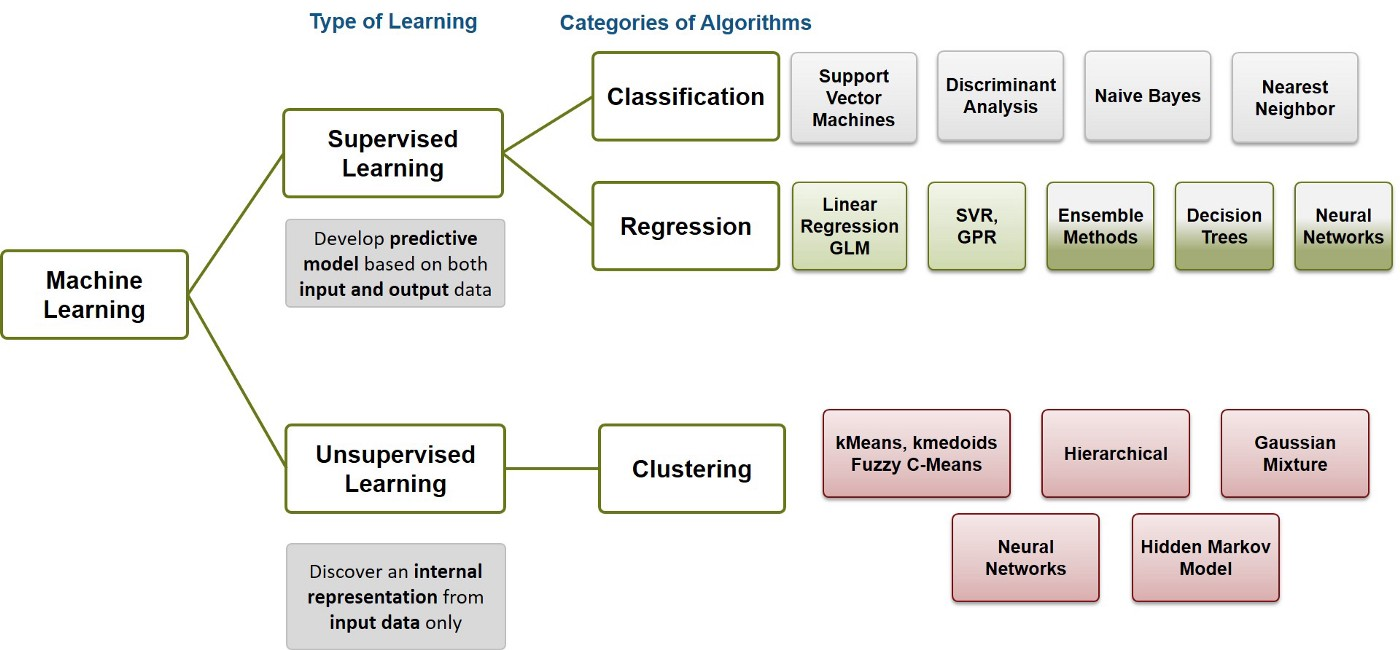

In [453]:
regressor.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

In [414]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train).round(8)  )
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(8))

MAE: 4.28267433
MSE: 43.7931622
RMSE: 6.61764023


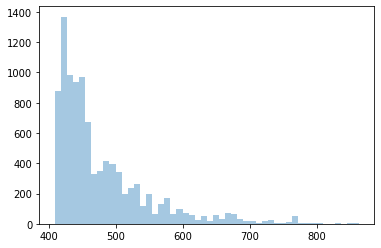

In [415]:
sns.distplot(y_pred_train, kde=False)

In [454]:
output = df_desafio

In [455]:
output['NU_NOTA_MT'] = y_pred_test

In [457]:
output['peso'] = (output['NU_NOTA_MT']*3 + output['NU_NOTA_CN']*2 + output['NU_NOTA_LC']*1.5+output['NU_NOTA_CH'] +output['NU_NOTA_REDACAO']*3)

In [462]:
# output.sort_values('peso', ascending=False)[['NU_INSCRICAO','NU_NOTA_MT']][0:20].to_csv('answer.csv',encoding='UTF-8' ,index=False)
#output.sort_values('peso', ascending=False)[['NU_INSCRICAO','NU_NOTA_MT']].to_csv('answer.csv',encoding='UTF-8' ,index=False)
output.sort_values('peso', ascending=False)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,...,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT,peso
1773,c363bec718e45cd6bf8cba599cc3990d77f95c22,33,RJ,17,M,1,1,2,0,3,1.0,0,4.0,0,0,0,0,0,0,0,...,759.9,708.9,0,1.0,180.0,180.0,180.0,200.0,180.0,920.0,G,G,Q,E,B,A,NaN,D,846.790717,8633.022151
3140,084d4e847b3809c6ee6622dd2e095156230f471b,31,MG,17,F,1,1,2,0,3,1.0,0,4.0,0,0,0,0,0,0,0,...,716.4,648.5,0,1.0,180.0,200.0,200.0,200.0,200.0,980.0,G,G,O,B,B,A,NaN,D,785.245358,8443.686073
107,328ca19128d276eb4fbc309c54ec7f346c803d2f,24,RN,29,M,3,1,1,10,1,NaN,0,NaN,0,0,0,0,0,0,0,...,716.3,697.1,0,1.0,200.0,200.0,200.0,200.0,180.0,980.0,G,C,O,C,B,C,K,D,759.387977,8366.713930
1837,e6375694613198f8db0720d7a8a04d8263116116,43,RS,21,F,1,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,...,696.6,649.9,1,1.0,180.0,200.0,200.0,200.0,200.0,980.0,D,D,F,B,B,A,NaN,D,762.275431,8306.476292
3272,890014a4e63d88574c62197a24fd43ba5749db83,29,BA,18,F,1,1,2,0,2,1.0,0,1.0,0,0,0,0,0,0,0,...,734.4,688.2,0,1.0,160.0,160.0,160.0,160.0,140.0,780.0,D,E,J,D,B,A,NaN,A,853.135507,8223.906522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,5a26f420290529ea3015d01dc6c86908db34193e,23,CE,18,M,3,1,3,0,1,NaN,1,NaN,0,0,0,0,0,0,0,...,421.7,413.1,1,1.0,40.0,40.0,0.0,40.0,40.0,160.0,D,C,B,B,B,A,NaN,A,415.659267,3671.127801
3128,bd09ed12d305ce65e639ab1ea2b00fd940ad7843,25,PB,18,F,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,...,363.6,406.7,1,1.0,80.0,40.0,40.0,20.0,0.0,180.0,H,G,D,B,B,A,NaN,A,409.018223,3608.504670
1229,b11e9bf8d068464d8d1ecef81cad5c24a3dd1d44,31,MG,19,M,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,...,368.7,360.1,1,1.0,60.0,60.0,20.0,40.0,40.0,220.0,H,H,B,B,B,A,NaN,A,408.404804,3578.064412
3611,3e0fd99c643bac4c7354025cacbc04922c4d7af8,29,BA,38,M,1,1,1,6,1,NaN,0,NaN,0,0,0,0,0,0,0,...,425.4,401.6,1,1.0,40.0,40.0,40.0,20.0,20.0,160.0,C,C,C,A,B,A,NaN,A,415.593860,3545.581581


## Erros

In [ ]:
y_pred_train = lm.predict(X_train)

In [ ]:
y_pred_desafio = lm.predict(X_desafio)

In [ ]:
ax = sns.scatterplot(x=y_pred_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Notas Mat - Previsão', fontsize=14)
ax.set_ylabel('Notas Mat - Real', fontsize=14)
ax

In [ ]:
residuo = y_train - y_pred_train

In [ ]:
ax = sns.scatterplot(x=y_pred_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

In [ ]:
ax = sns.scatterplot(x=y_pred_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

In [ ]:
ax = sns.distplot(residuo, bins=10)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Notas Mat', fontsize=14)
ax

## COMPARE MODELS

In [ ]:
X2 = df_train[selection2].fillna(0)
X2.head(2)

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y, test_size=0.3)

In [ ]:
lm2 = LinearRegression()

In [ ]:
lm2.fit(X2_train, y_train)

In [ ]:
pd.DataFrame(zip(X2_train.columns, lm2.coef_), columns=['features','estimatedCoefficients'])

In [ ]:
print('Seleção 4 R² = {}'.format(lm.score(X_train, y_train).round(2)))
print('Seleção 2 R² = {}'.format(lm2.score(X2_train, y2_train).round(2)))

In [ ]:
y2_pred_test = lm2.predict(X2_test)

In [ ]:
#seleção 4
EQM = metrics.mean_squared_error(y_test, y_pred_test).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)).round(2)
R2 = metrics.r2_score(y_test, y_pred_test).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

In [ ]:
#seleção 2

EQM_2 = metrics.mean_squared_error(y2_test, y2_pred_test).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y2_pred_test)).round(2)
R2_2 = metrics.r2_score(y2_test, y2_pred_test).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])